<a href="https://colab.research.google.com/github/Je73hwg/1BM22CS046_MLLAB/blob/main/1BM22CS046_LAB3_LogisticRegg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*LOGISTIC_REGG LINEAR*


   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2 

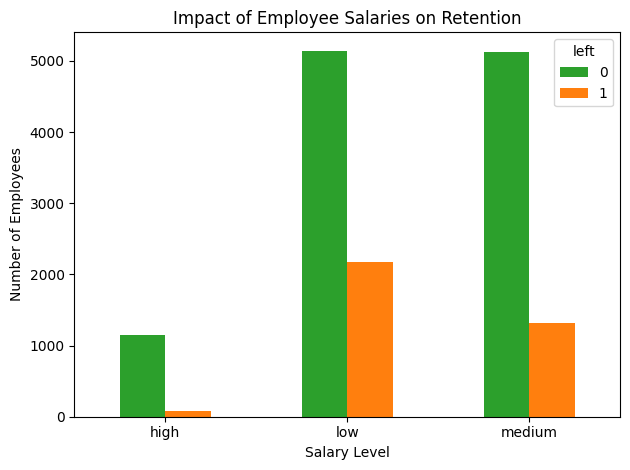

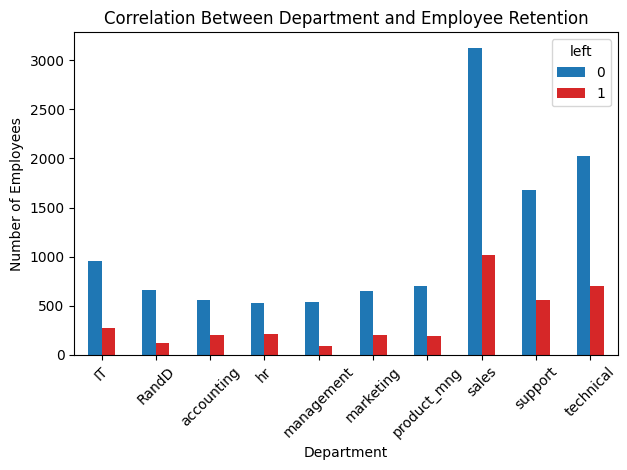


Model Accuracy: 76.76%


In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Step 1: Read the dataset
# Replace 'employee_data.csv' with the path to your CSV file
df = pd.read_csv('/content/HR_comma_sep.csv')

# Step 2: Exploratory Data Analysis (EDA)

# Display the first few rows of the dataset
print(df.head())

# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

# Check column names to find the correct column
print("\nColumn names in the dataset:")
print(df.columns)

# Bar Chart: Impact of Employee Salaries on Retention
salary_retention = pd.crosstab(df.salary, df.left)
salary_retention.plot(kind='bar', title='Impact of Employee Salaries on Retention', color=['#2ca02c', '#ff7f0e'])
plt.xlabel('Salary Level')
plt.ylabel('Number of Employees')
plt.xticks(rotation=0)
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

# Bar Chart: Correlation Between Department and Employee Retention
# Change 'department' to the correct column name if necessary
# Assuming 'department' is correct or update to the correct column name from print(df.columns)
department_retention = pd.crosstab(df['Department'], df.left)  # Replace 'department' if needed
department_retention.plot(kind='bar', title='Correlation Between Department and Employee Retention', color=['#1f77b4', '#d62728'])
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

# Step 3: Prepare data for Logistic Regression

# Select relevant features for the model
dflr = df[['satisfaction_level', 'average_montly_hours', 'promotion_last_5years', 'salary', 'left']]

# Create dummy variables for the 'salary' categorical variable
salary_dummies = pd.get_dummies(dflr.salary, prefix='salary', drop_first=True)
df_dummies = pd.concat([dflr.drop('salary', axis=1), salary_dummies], axis=1)

# Define features (X) and target (y)
X = df_dummies.drop('left', axis=1)
y = df_dummies['left']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Build and Train the Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 5: Make Predictions
predictions = model.predict(X_test)

# Step 6: Measure Model Accuracy
accuracy = accuracy_score(y_test, predictions)

# Display the accuracy as a percentage
accuracy_percentage = accuracy * 100
print(f'\nModel Accuracy: {accuracy_percentage:.2f}%')


*LOGISTIC REGG MULTI*

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2 

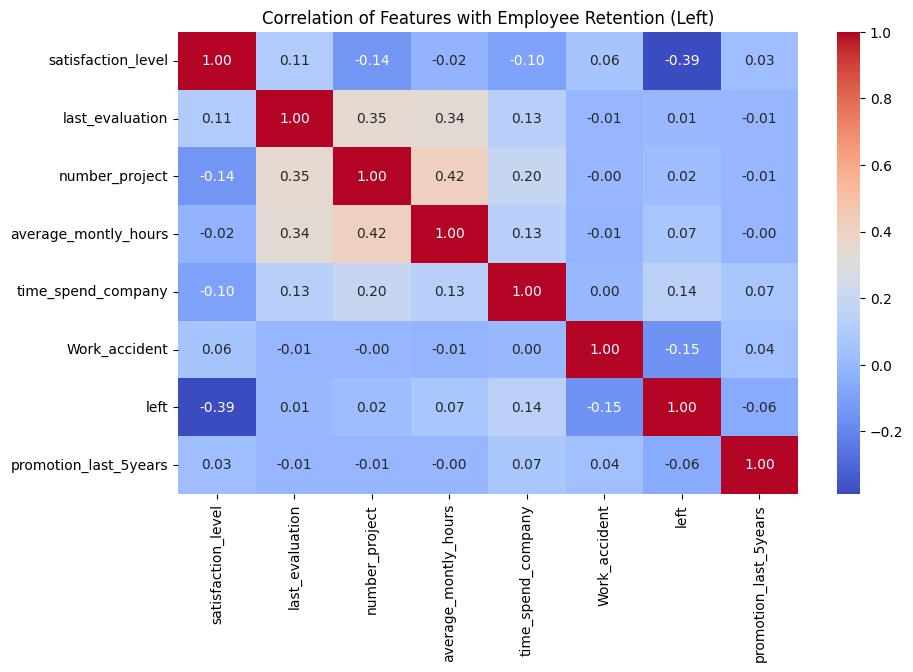

Correlation of features with 'left':
 left                     1.000000
time_spend_company       0.144822
average_montly_hours     0.071287
number_project           0.023787
last_evaluation          0.006567
promotion_last_5years   -0.061788
Work_accident           -0.154622
satisfaction_level      -0.388375
Name: left, dtype: float64


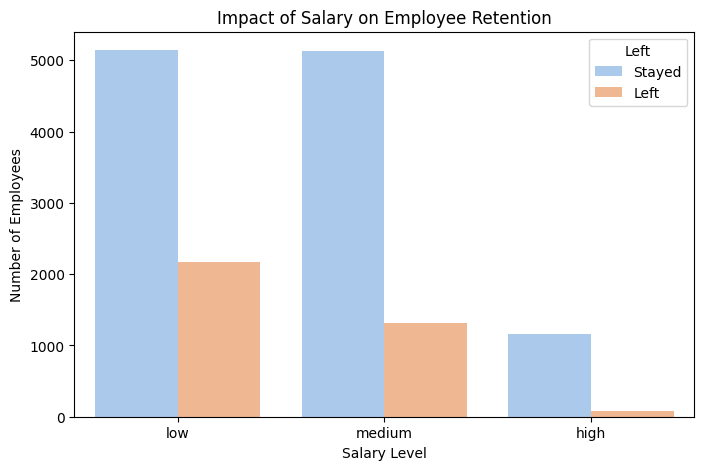

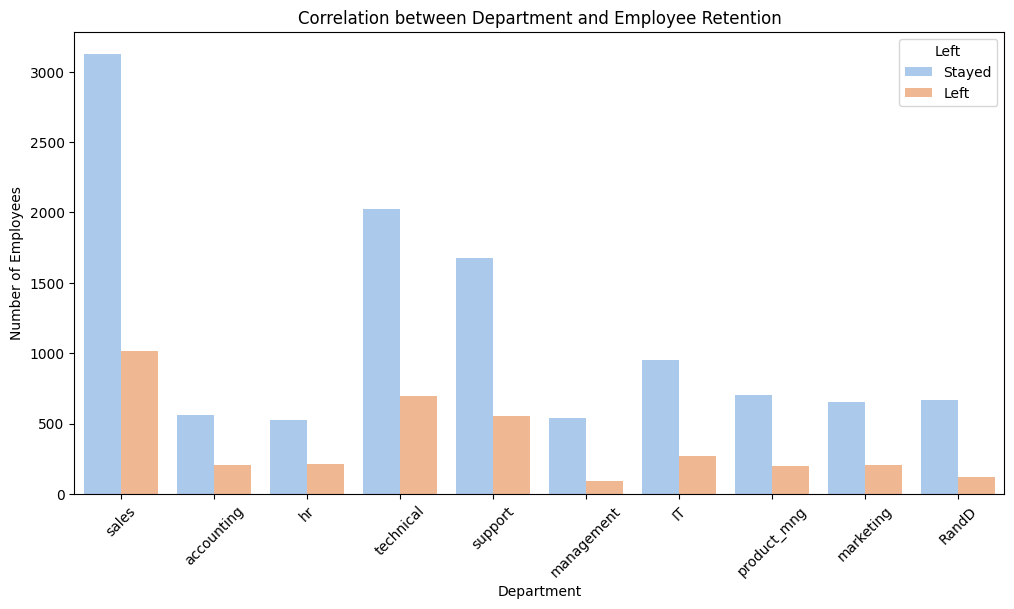

Model Accuracy: 76.31%


In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the dataset
file_path = "HR_comma_sep.csv"  # Update with the correct path if needed
data = pd.read_csv(file_path)

# Display the first few rows
print(data.head())

# Check correlation of numerical variables with 'left'
correlation = data.corr(numeric_only=True)['left'].sort_values(ascending=False)

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation of Features with Employee Retention (Left)')
plt.show()

# Print correlation results
print("Correlation of features with 'left':\n", correlation)

# Plot bar chart for salary and retention
plt.figure(figsize=(8, 5))
sns.countplot(x='salary', hue='left', data=data, palette='pastel')
plt.title('Impact of Salary on Employee Retention')
plt.xlabel('Salary Level')
plt.ylabel('Number of Employees')
plt.legend(title='Left', labels=['Stayed', 'Left'])
plt.show()

# Plot bar chart for department and retention
plt.figure(figsize=(12, 6))
sns.countplot(x='Department', hue='left', data=data, palette='pastel')
plt.title('Correlation between Department and Employee Retention')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.legend(title='Left', labels=['Stayed', 'Left'])
plt.show()

# Prepare the data for modeling
X = data[['satisfaction_level', 'time_spend_company', 'average_montly_hours', 'salary']]
y = data['left']

# One-hot encode the salary column
X = pd.get_dummies(X, columns=['salary'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict and calculate accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Zoo Data Sample:
   animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   class_type  
0           1  
1           1  
2 

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Text(0.5, 1.0, 'Confusion Matrix for Zoo Data')

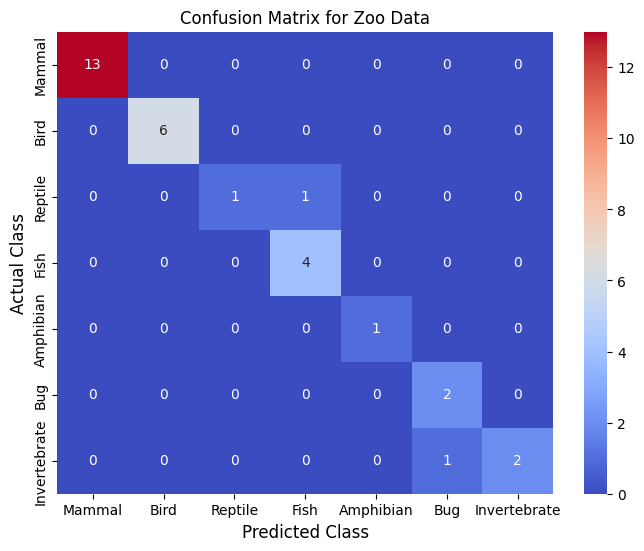

In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the datasets
zoo_data_path = "zoo-data.csv"  # Update the path if needed
class_type_path = "zoo-class-type.csv"

# Load datasets
zoo_data = pd.read_csv(zoo_data_path)
class_type = pd.read_csv(class_type_path)

# Display the first few rows of each dataset
print("Zoo Data Sample:\n", zoo_data.head())
print("\nClass Type Mapping Sample:\n", class_type.head())

# Drop 'animal_name' as it's not required for model training
zoo_data.drop('animal_name', axis=1, inplace=True)

# Prepare feature matrix (X) and target vector (y)
X = zoo_data.drop('class_type', axis=1)
y = zoo_data['class_type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Build and train the logistic regression model
model = LogisticRegression(max_iter=2000, multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

# Predict and calculate accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%\n")

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix with improved colors and cleaner layout
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm',  # Changed color palette to 'coolwarm'
            xticklabels=class_type['Class_Type'], yticklabels=class_type['Class_Type'])
plt.xlabel('Predicted Class', fontsize=12)
plt.ylabel('Actual Class', fontsize=12)
plt.title('Confusion Matrix for Zoo Data')


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.93


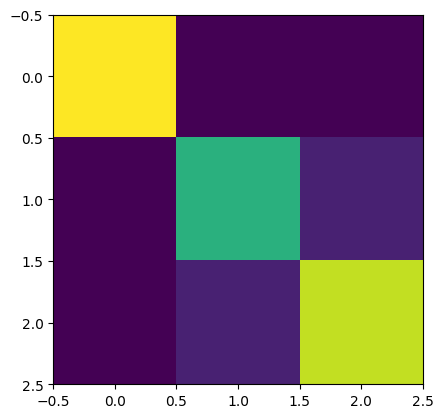

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Load Iris dataset
iris = pd.read_csv("iris.csv")

# Split data into features and target
X = iris.drop('species', axis='columns')
y = iris.species

# Train Multinomial Logistic Regression model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LogisticRegression(multi_class='multinomial')
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
plt.imshow(confusion_matrix(y_test, y_pred))
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 1.00


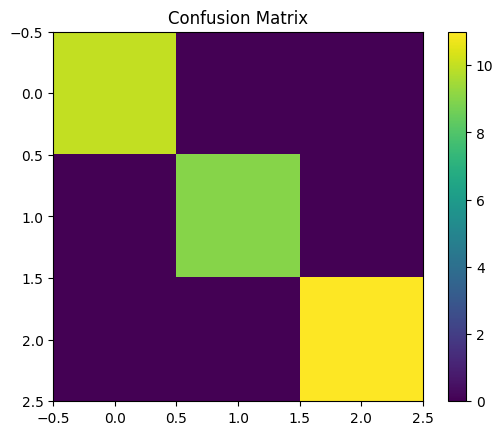

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = pd.read_csv("iris.csv")

# Define features and target
X = iris.drop('species', axis='columns')
y = iris.species

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Multinomial Logistic Regression model
model = LogisticRegression(multi_class='multinomial')
model.fit(X_train, y_train)

# Make predictions and calculate accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest')
plt.title("Confusion Matrix")
plt.colorbar()
plt.show()